##  Optimization manual steps

In [1]:
import random
import numpy as np
import pprint

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import MLP
from mycrograd_debug.drawviz_debug import draw_dot, draw_nn

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

global activation


#### Multi Layer Perceptron 1-2-1

In [2]:
# loss function single MLP
def loss_single(target, output):
    total_loss = (output - target)*(output - target)
    total_loss.type="l"
    return total_loss

In [3]:
# initialize a model
nin = 1  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(nin, [2, nout], weightsinit=2, lastReLU=False, debug_bw=True)
xinumbers = list(range(4, 4 + nin))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs= ", xinput[0].data)
print("parameters")
pp.pprint(model.parameters())

xtarget = Value(1.2, type="t")  # desired targets

Module nn MLP: structure [1, 2, 1]
inputs=  4
parameters
[   Value(name=v001,layernumber=L1,neuronnumber=N1,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v002,layernumber=L1,neuronnumber=N1,weightnumber=,type=b,data=0, grad=0),
    Value(name=v003,layernumber=L1,neuronnumber=N2,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=v004,layernumber=L1,neuronnumber=N2,weightnumber=,type=b,data=0, grad=0),
    Value(name=v005,layernumber=L2,neuronnumber=N1,weightnumber=,type=w1,data=0.6000000000000001, grad=0),
    Value(name=v006,layernumber=L2,neuronnumber=N1,weightnumber=,type=w2,data=1.2000000000000002, grad=0),
    Value(name=v007,layernumber=L2,neuronnumber=N1,weightnumber=,type=b,data=0, grad=0)]


In [4]:
# activation = model(xinput)

def act():
    global activation
    #### forward pass0
    activation = model(xinput)

def zeroGrad():
    global activation
    # for p in model.parameters():
    #     p.grad = 0.0
    model.zero_grad()
    print("zero'd gradients")
    pp.pprint(model.parameters())

def back():
    #### backward pass
    global activation
    activation.backward()
    print("parameters after backpass")
    pp.pprint(model.parameters())

def upd():
    #### update
    global activation
    for p in model.parameters():
        p.data += -0.1 * p.grad
    print("updated parameters")
    pp.pprint(model.parameters())

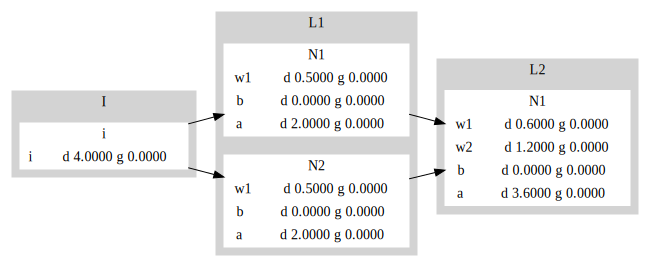

In [5]:
act()
dot=draw_nn(xinput, model)
dot

backward add   v015   0.00 ->   1.00 v016   0.00 ->   1.00
backward mul   v006   0.00 ->   2.00 v013   0.00 ->   1.20
backward add   v004   0.00 ->   1.20 v012   0.00 ->   1.20
backward mul   v003   0.00 ->   4.80 v008   0.00 ->   0.60
backward add   v007   0.00 ->   1.00 v014   0.00 ->   1.00
backward mul   v005   0.00 ->   2.00 v011   0.00 ->   0.60
backward add   v002   0.00 ->   0.60 v010   0.00 ->   0.60
backward mul   v001   0.00 ->   2.40 v008   0.60 ->   0.90
parameters after backpass
[   Value(name=v001,layernumber=L1,neuronnumber=N1,weightnumber=,type=w1,data=0.5, grad=2.4000000000000004),
    Value(name=v002,layernumber=L1,neuronnumber=N1,weightnumber=,type=b,data=0, grad=0.6000000000000001),
    Value(name=v003,layernumber=L1,neuronnumber=N2,weightnumber=,type=w1,data=0.5, grad=4.800000000000001),
    Value(name=v004,layernumber=L1,neuronnumber=N2,weightnumber=,type=b,data=0, grad=1.2000000000000002),
    Value(name=v005,layernumber=L2,neuronnumber=N1,weightnumber=,type=w1,

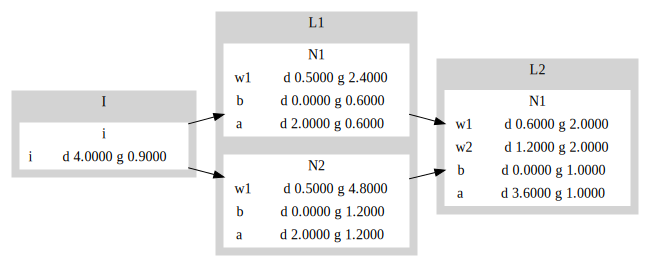

In [6]:
back()
dot=draw_nn(xinput, model)
dot

backward add   v015   1.00 ->   2.00 v016   1.00 ->   2.00
backward mul   v006   2.00 ->   6.00 v013   1.20 ->   3.60
backward add   v004   1.20 ->   4.80 v012   1.20 ->   4.80
backward mul   v003   4.80 ->  24.00 v008   0.90 ->   3.30
backward add   v007   1.00 ->   3.00 v014   1.00 ->   3.00
backward mul   v005   2.00 ->   8.00 v011   0.60 ->   2.40
backward add   v002   0.60 ->   3.00 v010   0.60 ->   3.00
backward mul   v001   2.40 ->  14.40 v008   3.30 ->   4.80
parameters after backpass
[   Value(name=v001,layernumber=L1,neuronnumber=N1,weightnumber=,type=w1,data=0.5, grad=14.400000000000002),
    Value(name=v002,layernumber=L1,neuronnumber=N1,weightnumber=,type=b,data=0, grad=3.0000000000000004),
    Value(name=v003,layernumber=L1,neuronnumber=N2,weightnumber=,type=w1,data=0.5, grad=24.000000000000004),
    Value(name=v004,layernumber=L1,neuronnumber=N2,weightnumber=,type=b,data=0, grad=4.800000000000001),
    Value(name=v005,layernumber=L2,neuronnumber=N1,weightnumber=,type=w1,

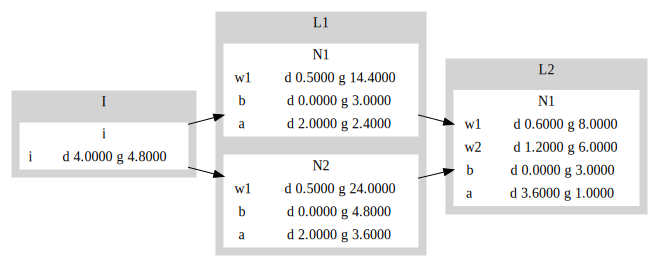

In [7]:
back()
dot=draw_nn(xinput, model)
dot

backward add   v015   2.00 ->   3.00 v016   2.00 ->   3.00
backward mul   v006   6.00 ->  12.00 v013   3.60 ->   7.20
backward add   v004   4.80 ->  12.00 v012   4.80 ->  12.00
backward mul   v003  24.00 ->  72.00 v008   4.80 ->  10.80
backward add   v007   3.00 ->   6.00 v014   3.00 ->   6.00
backward mul   v005   8.00 ->  20.00 v011   2.40 ->   6.00
backward add   v002   3.00 ->   9.00 v010   3.00 ->   9.00
backward mul   v001  14.40 ->  50.40 v008  10.80 ->  15.30
parameters after backpass
[   Value(name=v001,layernumber=L1,neuronnumber=N1,weightnumber=,type=w1,data=0.5, grad=50.400000000000006),
    Value(name=v002,layernumber=L1,neuronnumber=N1,weightnumber=,type=b,data=0, grad=9.000000000000002),
    Value(name=v003,layernumber=L1,neuronnumber=N2,weightnumber=,type=w1,data=0.5, grad=72.00000000000001),
    Value(name=v004,layernumber=L1,neuronnumber=N2,weightnumber=,type=b,data=0, grad=12.000000000000002),
    Value(name=v005,layernumber=L2,neuronnumber=N1,weightnumber=,type=w1,d

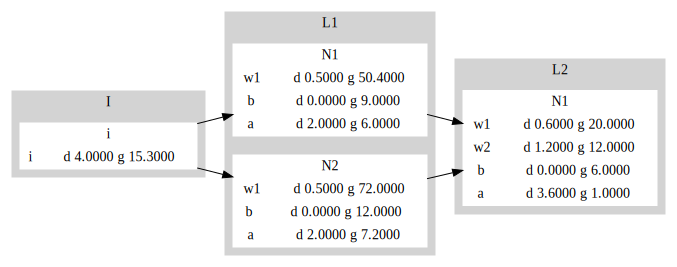

In [8]:
back()
dot=draw_nn(xinput, model)
dot

backward add   v015   3.00 ->   4.00 v016   3.00 ->   4.00
backward mul   v006  12.00 ->  20.00 v013   7.20 ->  12.00
backward add   v004  12.00 ->  24.00 v012  12.00 ->  24.00
backward mul   v003  72.00 ->  168.00 v008  15.30 ->  27.30
backward add   v007   6.00 ->  10.00 v014   6.00 ->  10.00
backward mul   v005  20.00 ->  40.00 v011   6.00 ->  12.00
backward add   v002   9.00 ->  21.00 v010   9.00 ->  21.00
backward mul   v001  50.40 ->  134.40 v008  27.30 ->  37.80
parameters after backpass
[   Value(name=v001,layernumber=L1,neuronnumber=N1,weightnumber=,type=w1,data=0.5, grad=134.40000000000003),
    Value(name=v002,layernumber=L1,neuronnumber=N1,weightnumber=,type=b,data=0, grad=21.000000000000004),
    Value(name=v003,layernumber=L1,neuronnumber=N2,weightnumber=,type=w1,data=0.5, grad=168.00000000000003),
    Value(name=v004,layernumber=L1,neuronnumber=N2,weightnumber=,type=b,data=0, grad=24.000000000000004),
    Value(name=v005,layernumber=L2,neuronnumber=N1,weightnumber=,type=

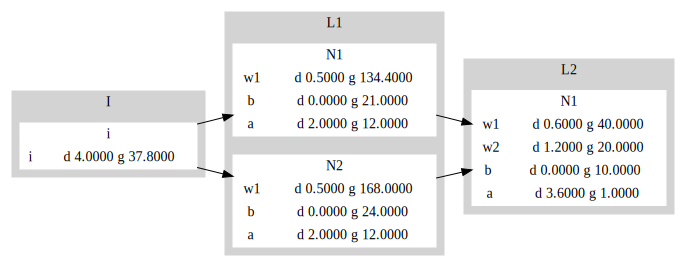

In [9]:
back()
dot=draw_nn(xinput, model)
dot

backward add   v015   4.00 ->   5.00 v016   4.00 ->   5.00
backward mul   v006  20.00 ->  30.00 v013  12.00 ->  18.00
backward add   v004  24.00 ->  42.00 v012  24.00 ->  42.00
backward mul   v003  168.00 ->  336.00 v008  37.80 ->  58.80
backward add   v007  10.00 ->  15.00 v014  10.00 ->  15.00
backward mul   v005  40.00 ->  70.00 v011  12.00 ->  21.00
backward add   v002  21.00 ->  42.00 v010  21.00 ->  42.00
backward mul   v001  134.40 ->  302.40 v008  58.80 ->  79.80
parameters after backpass
[   Value(name=v001,layernumber=L1,neuronnumber=N1,weightnumber=,type=w1,data=0.5, grad=302.4000000000001),
    Value(name=v002,layernumber=L1,neuronnumber=N1,weightnumber=,type=b,data=0, grad=42.00000000000001),
    Value(name=v003,layernumber=L1,neuronnumber=N2,weightnumber=,type=w1,data=0.5, grad=336.00000000000006),
    Value(name=v004,layernumber=L1,neuronnumber=N2,weightnumber=,type=b,data=0, grad=42.00000000000001),
    Value(name=v005,layernumber=L2,neuronnumber=N1,weightnumber=,type=w

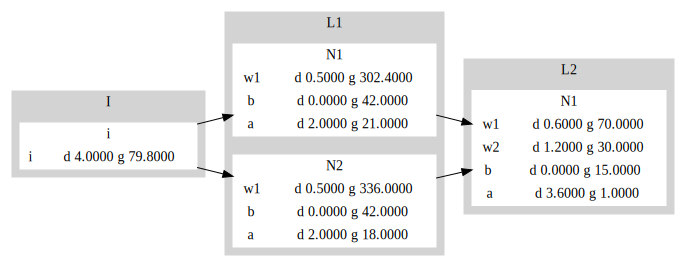

In [10]:
back()
dot=draw_nn(xinput, model)
dot

In [11]:
# pp.pprint(model.parameters())
# activation = model(xinput)
# loss = loss_single(activation, xtarget)
# print("loss= ", loss.data)
# draw_dot(loss)